# **IMPORT DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn



In [1]:
#read datafile
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/abnormal-detection/cleanedDataset/allinOneInput.csv")
print(df.head())
df.describe()

   Dst Port  Protocol    Timestamp  ...  Idle Max  Idle Min             Label
0       445         6  571928241.0  ...         0         0            Benign
1     50467         6  572610244.0  ...         0         0            Benign
2      3389         6  571896957.0  ...         0         0            Benign
3        80         6  572060813.0  ...         0         0  DoS attacks-Hulk
4     48914         6  572060830.0  ...         0         0            Benign

[5 rows x 80 columns]


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5225413.0,5225413.0,5225413.0,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5225413.0,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5225413.0,5225413.0,5225413.0,5225413.0,5225413.0,5225413.0,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06,5.225413e+06
mean,1.204306e+04,7.761964e+00,5.722094e+08,7.691509e+06,4.368769e+01,4.980792e+00,1.655351e+03,3.458200e+03,2.553511e+02,7.122543e+00,5.829736e+01,1.017672e+02,2.890908e+02,1.676785e+01,9.521688e+01,1.199804e+02,2.248304e+05,8.739300e+04,2.605214e+06,1.689358e+06,6.301604e+06,4.575292e+05,7.459114e+06,2.874544e+06,1.764049e+06,6.144890e+06,5.659023e+05,4.979545e+06,5.609184e+05,6.034087e+05,1.727283e+06,1.741289e+05,2.213107e-02,0.0,0.0,0.0,4.253959e+02,1.123596e+02,5.087451e+04,3.651848e+04,7.046767e+00,3.871631e+02,7.278685e+01,1.250630e+02,4.159155e+04,2.894125e-03,2.213107e-02,1.438252e-01,3.831171e-01,4.411194e-01,4.717024e-02,0.0,1.438244e-01,4.158244e-01,8.322861e+01,5.829736e+01,9.521688e+01,0.0,0.0,0.0,0.0,0.0,0.0,4.368769e+01,1.655351e+03,4.980792e+00,3.458200e+03,1.555588e+04,6.731064e+03,4.042310e+01,2.182478e+01,4.670778e+04,2.045895e+04,7.860095e+04,3.488496e+04,4.005716e+06,5.212137e+05,4.975894e+06,3.322907e+06
std,2.160638e+04,4.146260e+00,2.459773e+06,8.694040e+08,2.196293e+03,1.116067e+02,7.182244e+04,1.615670e+05,3.682994e+02,2.013596e+01,7.359756e+01,1.547844e+02,4.305633e+02,4.303377e+01,1.467440e+02,1.799445e+02,3.402952e+06,3.273529e+05,3.924211e+08,5.959123e+08,1.162125e+09,1.317550e+09,8.694005e+08,3.924308e+08,5.959127e+08,1.162124e+09,1.317553e+09,2.106705e+07,3.755997e+06,2.992007e+06,8.490002e+06,3.121777e+06,1.471098e-01,0.0,0.0,0.0,1.759143e+04,2.234956e+03,2.134518e+05,1.452652e+05,1.933151e+01,4.953752e+02,9.926092e+01,1.610925e+02,1.062319e+05,5.371918e-02,1.471098e-01,3.509124e-01,4.861465e-01,4.965210e-01,2.120029e-01,0.0,3.509116e-01,6.068396e-01,1.052242e+02,7.359756e+01,1.467440e+02,0.0,0.0,0.0,0.0,0.0,0.0,2.196293e+03,7.182244e+04,1.116067e+02,1.615670e+05,2.176081e+04,1.716231e+04,2.195962e+03,9.083480e+00,5.778943e+05,2.310298e+05,7.443621e+05,5.381907e+05,4.634770e+08,2.981901e+08,1.101966e+09,1.095879e+08
min,0.000000e+00,0.000000e+00,-9.

visualize

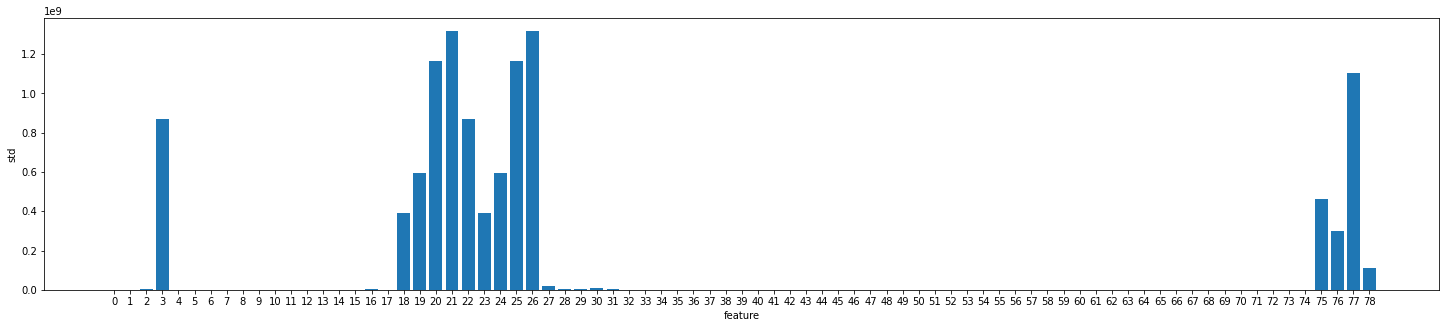

In [2]:
fig, ax = plt.subplots(figsize=(25,5))  

#bar std
std = df.std()
plt.bar(range(len(std)), std)
plt.xlabel("feature")
plt.ylabel("std")
plt.xticks(range(len(std)))
plt.show()

In [ ]:
#use heatmap
covMatrix = pd.DataFrame.cov(df)
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(covMatrix, linewidths= 0.5, ax=ax)
plt.show()

# **BUILD THE MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
def create_new_model(input_shape, ouput_shape):
  '''
  input_shape : demension dataframe with format (col, row)
  output_shape : numbers label unique
  '''
  model = Sequential()

  #make layer 1
  model.add(Dense(78, activation='relu', input_shape=(input_shape))
  #make laye 2
  model.add(Dense(100, activation='relu'))
  #make output layer
  model.add(Dense(output_shape, activation='softmax'))
  #model compile
  model.compile(optimizer='adam', loss='categorical_crosstropy', metrics=['accuracy'])

In [ ]:
def experiment():
  

# Preprocessing dataset

split data

In [2]:
#extract label and encode
data_labels = df.pop('Label')

In [3]:

#standard feature
mean_std = np.mean(df.std(axis=1))
data_filter_features = df[[col for col in df if df[col].std() > mean_std]]
del df #limit ram

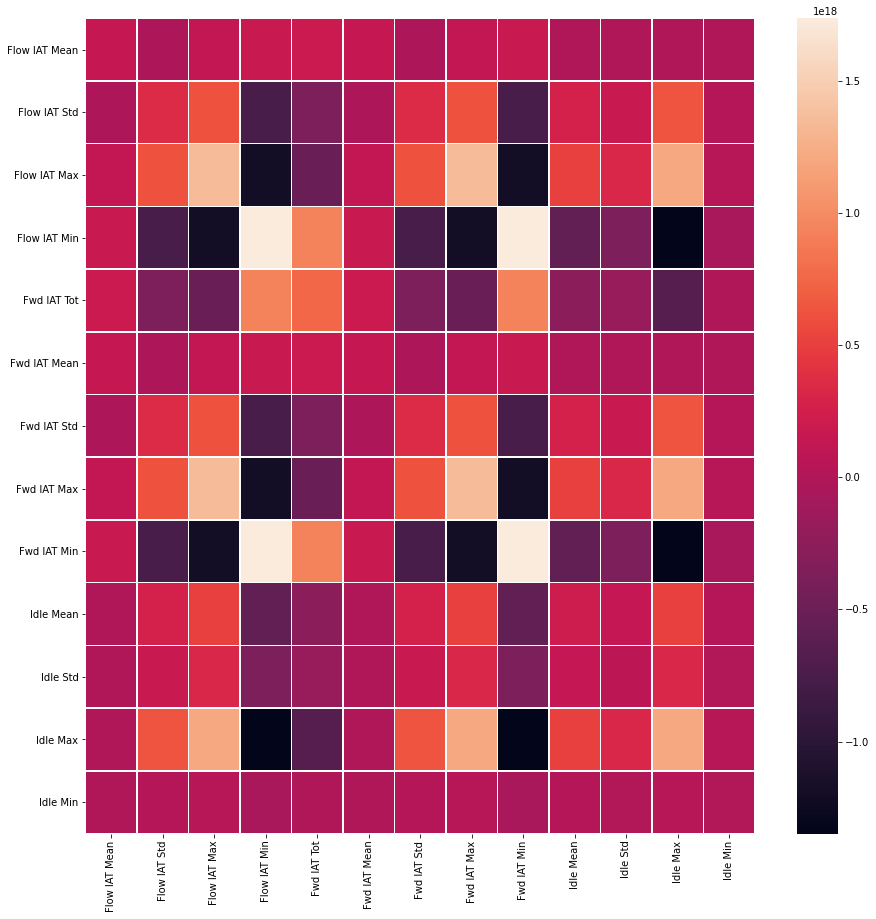

In [11]:
#test cell
import seaborn as sns
import matplotlib.pyplot as plt

covMatrix = pd.DataFrame.cov(data_filter_features)
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(covMatrix, linewidths= 0.5, ax=ax)
plt.show()